In [1]:
import os

import matplotlib
import matplotlib.legend
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

# Plot sizes
# Single plot: (6,4), tight_layout
# Double plot: (12,4), tight_layout

IMG_PATH = "/home/belerico/projects/sae-transfer-learning/imgs/"
EVAL_PATH = "/home/belerico/projects/sae-transfer-learning/eval/"
os.makedirs(IMG_PATH, exist_ok=True)

### Utils

In [2]:
def read_fwd_eval(ckpt: str) -> pd.DataFrame:
    fwd = pd.read_csv(EVAL_PATH + f"rs-post_transfer_forward_{ckpt}_all_mse.csv")
    fwd.rename(columns={"Unnamed: 0": "L"}, inplace=True)
    fwd[["ACT-Layer", "SAE-Layer"]] = fwd["L"].str.split("-", n=1, expand=True)
    fwd["ACT-Layer"] = fwd["ACT-Layer"].astype(int)
    fwd["SAE-Layer"] = fwd["SAE-Layer"].astype(int) + 1
    fwd = fwd.sort_values(by=["ACT-Layer", "SAE-Layer"])
    return fwd


def read_bwd_eval(ckpt: str) -> pd.DataFrame:
    bwd = pd.read_csv(EVAL_PATH + f"rs-post_transfer_backward_{ckpt}_all_mse.csv")
    bwd.rename(columns={"Unnamed: 0": "L"}, inplace=True)
    bwd[["ACT-Layer", "SAE-Layer"]] = bwd["L"].str.split("-", n=1, expand=True)
    bwd["ACT-Layer"] = bwd["ACT-Layer"].astype(int)
    bwd["SAE-Layer"] = bwd["SAE-Layer"].astype(int) - 1
    bwd = bwd.sort_values(by=["ACT-Layer", "SAE-Layer"])
    return bwd

### Baseline

In [3]:
baseline = pd.read_csv(EVAL_PATH + "rs-post_all_mse.csv")
baseline.rename(columns={'Unnamed: 0':'L'}, inplace=True)
baseline

,L,kl_div_with_sae,kl_div_with_ablation,ce_loss_with_sae,ce_loss_without_sae,ce_loss_with_ablation,kl_div_score,ce_loss_score,l2_norm_in,l2_norm_out,l2_ratio,l0,l1,explained_variance,mse,total_tokens_evaluated
0,0-0,NaN,NaN,3.408097,3.065878,14.046822,NaN,0.968835,8.892148,7.750052,0.875380,13.532349,9.460178,0.868826,9.735006e+00,262144.0
1,0-1,NaN,NaN,4.367182,3.160122,13.913139,NaN,0.887747,8.866869,10.670202,1.188830,48.587891,16.943966,0.444341,3.858809e+01,262144.0
2,0-2,NaN,NaN,4.935888,3.115358,15.213541,NaN,0.849520,8.957768,13.506168,1.446785,132.794434,34.878029,-0.541333,1.281156e+02,262144.0
3,0-3,NaN,NaN,5.234643,3.203166,13.053946,NaN,0.793775,8.992187,13.562613,1.462650,212.265137,48.625744,-0.516962,1.158979e+02,262144.0
4,0-4,NaN,NaN,4.974465,3.009706,14.885315,NaN,0.834555,8.945927,14.590097,1.599722,351.324097,71.443054,-0.930730,1.292232e+02,262144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,11-7,NaN,NaN,11.318004,3.034473,10.157478,NaN,-0.162926,86.214539,984.788696,11.307749,4222.083008,13903.743164,-1412.256836,1.014024e+06,262144.0
140,11-8,NaN,NaN,12.011387,3.094152,10.491833,NaN,-0.205410,81.641319,1222.830811,14.809101,4413.660645,13764.156250,-2043.666382,1.628885e+06,262144.0
141,11-9,NaN,NaN,11.833664,3.072817,10.092566,NaN,-0.248028,88.120010,1500.049316,16.967474,4482.791016,14590.498047,-3598.639404,2.343972e+06,262144.0
142,11-10,NaN,NaN,11.993760,3.122844,10.124535,NaN,-0.266968,84.013306,891.071533,10.497403,3546.361328,7884.976562,-1200.900024,8.081392e+05,262144.0


In [4]:
baseline[["ACT-Layer", "SAE-Layer"]] = baseline["L"].str.split("-", n=1, expand=True)
baseline["ACT-Layer"] = baseline["ACT-Layer"].astype(int)
baseline["SAE-Layer"] = baseline["SAE-Layer"].astype(int)
baseline = baseline.sort_values(by=["ACT-Layer", "SAE-Layer"])
baseline

,L,kl_div_with_sae,kl_div_with_ablation,ce_loss_with_sae,ce_loss_without_sae,ce_loss_with_ablation,kl_div_score,ce_loss_score,l2_norm_in,l2_norm_out,l2_ratio,l0,l1,explained_variance,mse,total_tokens_evaluated,ACT-Layer,SAE-Layer
0,0-0,NaN,NaN,3.408097,3.065878,14.046822,NaN,0.968835,8.892148,7.750052,0.875380,13.532349,9.460178,0.868826,9.735006e+00,262144.0,0,0
1,0-1,NaN,NaN,4.367182,3.160122,13.913139,NaN,0.887747,8.866869,10.670202,1.188830,48.587891,16.943966,0.444341,3.858809e+01,262144.0,0,1
2,0-2,NaN,NaN,4.935888,3.115358,15.213541,NaN,0.849520,8.957768,13.506168,1.446785,132.794434,34.878029,-0.541333,1.281156e+02,262144.0,0,2
3,0-3,NaN,NaN,5.234643,3.203166,13.053946,NaN,0.793775,8.992187,13.562613,1.462650,212.265137,48.625744,-0.516962,1.158979e+02,262144.0,0,3
4,0-4,NaN,NaN,4.974465,3.009706,14.885315,NaN,0.834555,8.945927,14.590097,1.599722,351.324097,71.443054,-0.930730,1.292232e+02,262144.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,11-7,NaN,NaN,11.318004,3.034473,10.157478,NaN,-0.162926,86.214539,984.788696,11.307749,4222.083008,13903.743164,-1412.256836,1.014024e+06,262144.0,11,7
140,11-8,NaN,NaN,12.011387,3.094152,10.491833,NaN,-0.205410,81.641319,1222.830811,14.809101,4413.660645,13764.156250,-2043.666382,1.628885e+06,262144.0,11,8
141,11-9,NaN,NaN,11.833664,3.072817,10.092566,NaN,-0.248028,88.120010,1500.049316,16.967474,4482.791016,14590.498047,-3598.639404,2.343972e+06,262144.0,11,9
142,11-10,NaN,NaN,11.993760,3.122844,10.124535,NaN,-0.266968,84.013306,891.071533,10.497403,3546.361328,7884.976562,-1200.900024,8.081392e+05,262144.0,11,10


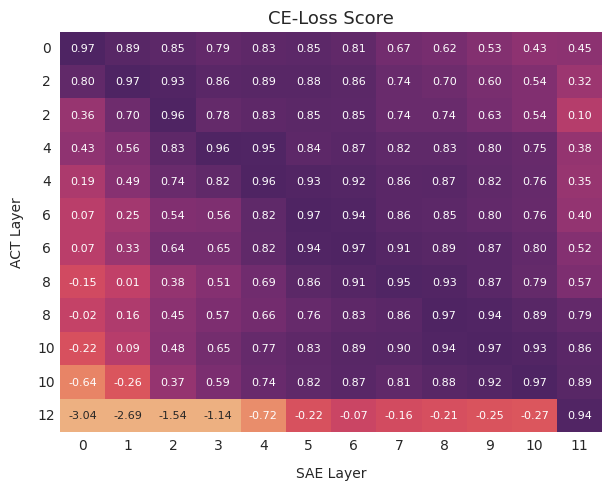

In [42]:
sns.set_context("paper")

# Use seaborn to plot a heatmap out of baseline[["ce_loss_score"]].to_numpy().reshape(12, 12)
plt.figure(figsize=(7, 5.2))
sns.set_theme()
ax = sns.heatmap(
    baseline[["ce_loss_score"]].to_numpy().reshape(12, 12),
    annot=True,
    fmt=".2f",
    cmap="flare",
    annot_kws={"size": 8},
    vmax=1,
    vmin=-1,
    cbar=False,
)
ax.set_title("CE-Loss Score")
ax.set_ylabel("ACT Layer")
ax.set_xlabel("SAE Layer")
ax.set_xticklabels(np.arange(0, 12), va="center", ha="center")
ax.set_yticklabels(np.arange(0, 12), va="center", ha="center")
ax.title.set_fontsize(13)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.tick_params(axis="both", which="major", labelsize=10, rotation=0)
ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
plt.savefig(IMG_PATH + "heatmap_ce_loss_score.png", dpi=300, bbox_inches="tight")
plt.show()

### Mapping

In [6]:
mapping = {"1": "100003840", "2": "200003584", "3": "300003328", "4": "400003072", "final": "final_500002816"}
ckpt = mapping["final"]

In [7]:
mapping.values()

dict_values(['100003840', '200003584', '300003328', '400003072', 'final_500002816'])

### Forward

In [8]:
fwd = read_fwd_eval(ckpt)
fwd.head()

,L,kl_div_with_sae,kl_div_with_ablation,ce_loss_with_sae,ce_loss_without_sae,ce_loss_with_ablation,kl_div_score,ce_loss_score,l2_norm_in,l2_norm_out,l2_ratio,l0,l1,explained_variance,mse,total_tokens_evaluated,ACT-Layer,SAE-Layer
0,0-0,NaN,NaN,4.101486,3.065878,14.046822,NaN,0.905690,8.892148,10.773813,1.201880,32.910156,14.861841,0.467440,35.256271,262144.0,0,1
12,0-1,NaN,NaN,4.669418,3.065878,14.046822,NaN,0.853971,8.892148,13.086042,1.445637,83.781494,25.978752,-0.301929,91.431335,262144.0,0,2
24,0-2,NaN,NaN,5.035533,3.065878,14.046822,NaN,0.820630,8.892148,13.884325,1.532447,175.361450,42.328377,-0.694128,116.334557,262144.0,0,3
36,0-3,NaN,NaN,5.140078,3.065878,14.046822,NaN,0.811109,8.892148,14.486532,1.598235,270.301025,59.240322,-0.996507,133.915604,262144.0,0,4
48,0-4,NaN,NaN,5.276780,3.065878,14.046822,NaN,0.798660,8.892148,18.623629,2.070233,490.916382,104.708862,-2.784307,233.662750,262144.0,0,5


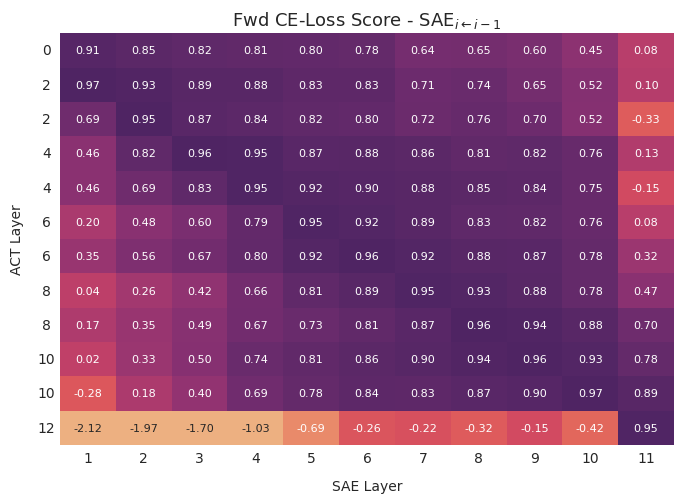

In [41]:
# Use seaborn to plot a heatmap out of baseline[["ce_loss_score"]].to_numpy().reshape(12, 12)
sns.set_theme()
plt.figure(figsize=(7, 5.2))
ax = sns.heatmap(
    fwd[["ce_loss_score"]].to_numpy().reshape(12, 11),
    annot=True,
    fmt=".2f",
    cmap="flare",
    annot_kws={"size": 8},
    vmax=1,
    vmin=-1,
    cbar=False,
)
ax.set_title("Fwd CE-Loss Score - SAE$_{i \leftarrow i-1}$")
ax.set_ylabel("ACT Layer")
ax.set_xlabel("SAE Layer")
ax.set_xticklabels(np.arange(1, 12), va="center", ha="center")
ax.set_yticklabels(np.arange(0, 12), va="center", ha="center")
ax.title.set_fontsize(13)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.tick_params(axis="both", which="major", labelsize=10, rotation=0)
ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
plt.tight_layout()
plt.savefig(IMG_PATH + f"heatmap_fwd_ce_loss_score_{ckpt}.png", dpi=300, bbox_inches="tight")

### Backward

In [10]:
bwd = read_bwd_eval(ckpt)
bwd.head()

,L,kl_div_with_sae,kl_div_with_ablation,ce_loss_with_sae,ce_loss_without_sae,ce_loss_with_ablation,kl_div_score,ce_loss_score,l2_norm_in,l2_norm_out,l2_ratio,l0,l1,explained_variance,mse,total_tokens_evaluated,ACT-Layer,SAE-Layer
0,0-1,NaN,NaN,3.411138,3.065878,14.046822,NaN,0.968558,8.892148,7.735016,0.874167,15.367920,9.498478,0.867004,10.042897,262144.0,0,0
12,0-2,NaN,NaN,4.285240,3.065878,14.046822,NaN,0.888957,8.892148,10.814079,1.202030,48.276733,16.551495,0.383671,43.078613,262144.0,0,1
24,0-3,NaN,NaN,4.968546,3.065878,14.046822,NaN,0.826730,8.892148,12.179924,1.332887,99.908691,25.822317,-0.246099,100.110985,262144.0,0,2
36,0-4,NaN,NaN,5.097346,3.065878,14.046822,NaN,0.815001,8.892148,12.578314,1.384887,179.403076,40.000458,-0.371003,95.706161,262144.0,0,3
48,0-5,NaN,NaN,5.026433,3.065878,14.046822,NaN,0.821458,8.892148,13.644230,1.510207,306.856812,61.849030,-0.720416,111.632004,262144.0,0,4


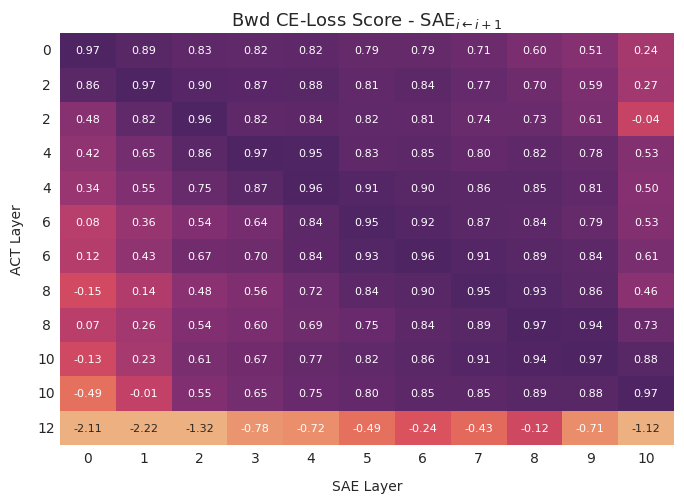

In [40]:
# Use seaborn to plot a heatmap out of baseline[["ce_loss_score"]].to_numpy().reshape(12, 12)
sns.set_theme()
plt.figure(figsize=(7, 5.2))
ax = sns.heatmap(
    bwd[["ce_loss_score"]].to_numpy().reshape(12, 11),
    annot=True,
    fmt=".2f",
    cmap="flare",
    annot_kws={"size": 8},
    vmax=1,
    vmin=-1,
    cbar=False,
)
ax.set_title("Bwd CE-Loss Score - SAE$_{i \leftarrow i+1}$")
ax.set_ylabel("ACT Layer")
ax.set_xlabel("SAE Layer")
ax.set_xticklabels(np.arange(0, 11), va="center", ha="center")
ax.set_yticklabels(np.arange(0, 12), va="center", ha="center")
ax.title.set_fontsize(13)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.tick_params(axis="both", which="major", labelsize=10, rotation=0)
ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
plt.tight_layout()
plt.savefig(IMG_PATH + f"heatmap_bwd_ce_loss_score_{ckpt}.png", dpi=300, bbox_inches="tight")

In [12]:
# TODO:
# - Add one plot for checkpoint
# - Plot/Show-table for L0 and L1

### Baseline - fwd/bwd CE-Loss

In [13]:
fwd_baseline = lambda x: x[x["ACT-Layer"] - 1 == x["SAE-Layer"]]  # Forward baseline i on i+1
fwd_baseline(baseline)

,L,kl_div_with_sae,kl_div_with_ablation,ce_loss_with_sae,ce_loss_without_sae,ce_loss_with_ablation,kl_div_score,ce_loss_score,l2_norm_in,l2_norm_out,l2_ratio,l0,l1,explained_variance,mse,total_tokens_evaluated,ACT-Layer,SAE-Layer
12,1-0,NaN,NaN,5.350231,3.065878,14.779825,NaN,0.804989,11.600180,7.204940,0.595609,14.550903,10.071194,0.340051,291.185150,262144.0,1,0
25,2-1,NaN,NaN,5.715965,3.160122,11.663170,NaN,0.699420,12.668333,8.236341,0.650453,19.892578,9.337999,0.429315,64.720695,262144.0,2,1
38,3-2,NaN,NaN,5.545763,3.115358,17.471745,NaN,0.830709,13.774193,9.375708,0.675856,59.097168,20.304142,0.433316,86.722862,262144.0,3,2
51,4-3,NaN,NaN,4.880911,3.203166,12.468016,NaN,0.818913,14.624746,9.959815,0.671460,61.574829,20.110771,0.485770,78.664383,262144.0,4,3
64,5-4,NaN,NaN,4.900346,3.009706,13.729712,NaN,0.823634,17.564312,11.085056,0.609076,74.170410,23.440769,0.291280,120.464630,262144.0,5,4
77,6-5,NaN,NaN,3.866241,3.079556,17.339733,NaN,0.944833,18.008278,16.562737,0.905845,158.423706,53.130928,0.488904,134.277451,262144.0,6,5
90,7-6,NaN,NaN,4.320663,3.164787,15.617537,NaN,0.907179,22.836769,25.891720,1.069789,265.537598,100.212914,0.087874,625.500732,262144.0,7,6
103,8-7,NaN,NaN,4.594829,3.034473,14.310783,NaN,0.861625,24.886089,33.414753,1.276595,365.272461,148.225555,-0.697467,1615.166260,262144.0,8,7
116,9-8,NaN,NaN,3.727095,3.094152,14.284630,NaN,0.943439,24.610161,30.695438,1.199784,409.175903,147.551651,-0.226014,933.071106,262144.0,9,8
129,10-9,NaN,NaN,3.881516,3.072817,12.734020,NaN,0.916294,28.290672,34.866791,1.219222,507.920532,182.696777,0.142825,388.722443,262144.0,10,9


In [14]:
bwd_baseline = lambda x: x[x["ACT-Layer"] == x["SAE-Layer"] - 1]  # Backward baseline i on i-1
bwd_baseline(baseline)

,L,kl_div_with_sae,kl_div_with_ablation,ce_loss_with_sae,ce_loss_without_sae,ce_loss_with_ablation,kl_div_score,ce_loss_score,l2_norm_in,l2_norm_out,l2_ratio,l0,l1,explained_variance,mse,total_tokens_evaluated,ACT-Layer,SAE-Layer
1,0-1,NaN,NaN,4.367182,3.160122,13.913139,NaN,0.887747,8.866869,10.670202,1.188830,48.587891,16.943966,0.444341,38.588085,262144.0,0,1
14,1-2,NaN,NaN,4.005270,3.115358,15.982838,NaN,0.930840,11.296371,11.002556,0.952868,55.972656,19.091072,0.519058,69.278900,262144.0,1,2
27,2-3,NaN,NaN,4.945744,3.203166,11.029239,NaN,0.777337,12.878527,11.017860,0.830533,73.272827,26.313818,0.488184,142.942963,262144.0,2,3
40,3-4,NaN,NaN,3.730921,3.009706,17.394283,NaN,0.949862,13.969690,12.371120,0.883886,121.014771,35.400150,0.594157,62.342289,262144.0,3,4
53,4-5,NaN,NaN,4.013016,3.079556,17.433718,NaN,0.934969,14.427039,14.894337,1.028894,137.443115,40.874561,0.477879,92.044044,262144.0,4,5
66,5-6,NaN,NaN,3.900226,3.164787,15.758782,NaN,0.941604,17.523409,17.923725,0.994077,166.343018,51.800484,0.531260,105.157806,262144.0,5,6
79,6-7,NaN,NaN,3.920360,3.034473,13.225407,NaN,0.913071,18.164986,16.357956,0.887359,137.811401,42.022144,0.613619,104.043411,262144.0,6,7
92,7-8,NaN,NaN,3.814109,3.094152,13.828719,NaN,0.932931,22.426210,25.075481,1.098537,241.776733,78.859589,0.646864,154.365677,262144.0,7,8
105,8-9,NaN,NaN,3.691324,3.072817,14.119305,NaN,0.944009,25.181238,30.612350,1.188466,306.857910,102.959206,0.545964,221.891190,262144.0,8,9
118,9-10,NaN,NaN,3.803697,3.122844,13.074701,NaN,0.931585,25.073803,27.933483,1.093804,351.222412,114.238831,0.582084,213.220856,262144.0,9,10


In [15]:
base_baseline = lambda x: x[x["ACT-Layer"] == x["SAE-Layer"]]  # Baseline i on i
base_baseline(baseline)

,L,kl_div_with_sae,kl_div_with_ablation,ce_loss_with_sae,ce_loss_without_sae,ce_loss_with_ablation,kl_div_score,ce_loss_score,l2_norm_in,l2_norm_out,l2_ratio,l0,l1,explained_variance,mse,total_tokens_evaluated,ACT-Layer,SAE-Layer
0,0-0,NaN,NaN,3.408097,3.065878,14.046822,NaN,0.968835,8.892148,7.750052,0.875380,13.532349,9.460178,0.868826,9.735006,262144.0,0,0
13,1-1,NaN,NaN,3.500633,3.160122,14.631824,NaN,0.970317,11.133117,9.606907,0.862971,21.895020,12.212226,0.792521,19.478878,262144.0,1,1
26,2-2,NaN,NaN,3.485169,3.115358,12.680796,NaN,0.961339,12.692200,10.782604,0.849783,34.881470,16.570456,0.761439,28.633408,262144.0,2,2
39,3-3,NaN,NaN,3.668775,3.203166,16.018127,NaN,0.963667,14.005279,11.650215,0.827500,71.514771,24.955875,0.774386,33.942139,262144.0,3,3
52,4-4,NaN,NaN,3.464720,3.009706,14.586422,NaN,0.960696,14.543331,12.107776,0.827870,75.308472,26.359505,0.752515,38.227737,262144.0,4,4
65,5-5,NaN,NaN,3.544532,3.079556,17.046543,NaN,0.966709,17.349239,15.390509,0.883313,73.202515,26.409149,0.776789,36.241077,262144.0,5,5
78,6-6,NaN,NaN,3.600765,3.164787,16.222954,NaN,0.966613,18.255878,15.997032,0.871432,96.454590,32.683205,0.807228,41.015293,262144.0,6,6
91,7-7,NaN,NaN,3.496785,3.034473,12.573080,NaN,0.951533,22.503136,20.410471,0.902271,131.835938,40.187103,0.833888,46.275101,262144.0,7,7
104,8-8,NaN,NaN,3.484110,3.094152,15.307701,NaN,0.968072,24.168224,21.853857,0.898283,145.001587,46.322540,0.836172,53.362099,262144.0,8,8
117,9-9,NaN,NaN,3.400938,3.072817,12.840663,NaN,0.966408,25.192280,22.600367,0.890396,169.779785,56.358265,0.829949,62.877735,262144.0,9,9


### Normalized scores

##### Forward - All checkpoints

In [21]:
sns.set_context("paper")

# Automatic for every ckpt - forward
fwd_scores = {}
for ckpt in mapping.values():
    fwd = read_fwd_eval(ckpt)
    fwd_df = pd.concat(
        [
            base_baseline(baseline)
            .iloc[1:]
            .reset_index(drop=True)[["ce_loss_score"]]
            .rename(columns={"ce_loss_score": "No Transfer"}),
            base_baseline(fwd)
            .reset_index(drop=True)[["ce_loss_score"]]
            .rename(columns={"ce_loss_score": "Forward"}),
            fwd_baseline(baseline)
            .reset_index(drop=True)[["ce_loss_score"]]
            .rename(columns={"ce_loss_score": "Baseline Forward"}),
        ],
        axis=1,
    )
    fwd_df = fwd_df.to_numpy()
    # (Sae - (base i +- 1)) / ((base i) - (base i +- 1))
    scores = (fwd_df[:, 1] - fwd_df[:, 2]) / (fwd_df[:, 0] - fwd_df[:, 2])
    fwd_scores[ckpt.replace("final_", "")] = list(round(x, 3) for x in scores)

In [24]:
pd.DataFrame.from_dict(fwd_scores, orient="index", columns=np.arange(1, 12))

,1,2,3,4,5,6,7,8,9,10,11
100003840,0.962,0.960,0.983,0.920,0.865,0.439,0.955,0.948,0.858,0.944,1.003
200003584,0.968,0.968,0.996,0.933,0.873,0.459,0.970,0.956,0.894,0.965,1.005
300003328,0.969,0.971,1.000,0.941,0.877,0.475,0.981,0.960,0.911,0.972,1.005
400003072,0.971,0.974,1.003,0.944,0.879,0.479,0.988,0.963,0.921,0.978,1.006
500002816,0.972,0.975,1.005,0.946,0.881,0.488,0.991,0.964,0.929,0.981,1.006


In [25]:
cels_fwd_dfs = []
for i, ckpt in enumerate(mapping.values()):
    fwd = read_fwd_eval(ckpt)
    fwd_df = pd.concat(
        [
            base_baseline(baseline)
            .iloc[1:]
            .reset_index(drop=True)[["ce_loss_score"]]
            .rename(columns={"ce_loss_score": "No Transfer"}),
            base_baseline(fwd)
            .reset_index(drop=True)[["ce_loss_score"]]
            .rename(columns={"ce_loss_score": "Forward"}),
            fwd_baseline(baseline)
            .reset_index(drop=True)[["ce_loss_score"]]
            .rename(columns={"ce_loss_score": "Baseline Forward"}),
        ],
        axis=1,
    )
    fwd_df["checkpoint"] = ckpt.replace("final_", "")
    cels_fwd_dfs.append(fwd_df)

In [26]:
remove_baseline = True
if remove_baseline:
    cels_fwd_dfs_plot = (
        pd.concat(cels_fwd_dfs, axis=0)
        .reset_index(names="i")
        .melt(id_vars=["checkpoint", "i"], var_name="type", value_name="cels")
    )
    cels_fwd_dfs_plot = cels_fwd_dfs_plot[cels_fwd_dfs_plot["type"] != "Baseline Forward"]
else:
    cels_fwd_dfs_plot = (
        pd.concat(cels_fwd_dfs, axis=0)
        .reset_index(names="i")
        .melt(id_vars=["checkpoint", "i"], var_name="type", value_name="cels")
    )
cels_fwd_dfs_plot["i"] = cels_fwd_dfs_plot["i"] + 1
cels_fwd_dfs_plot.head()

,checkpoint,i,type,cels
0,100003840,1,No Transfer,0.970317
1,100003840,2,No Transfer,0.961339
2,100003840,3,No Transfer,0.963667
3,100003840,4,No Transfer,0.960696
4,100003840,5,No Transfer,0.966709


/tmp/ipykernel_119066/1719459139.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_119066/1719459139.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_119066/1719459139.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_119066/1719459139.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"]

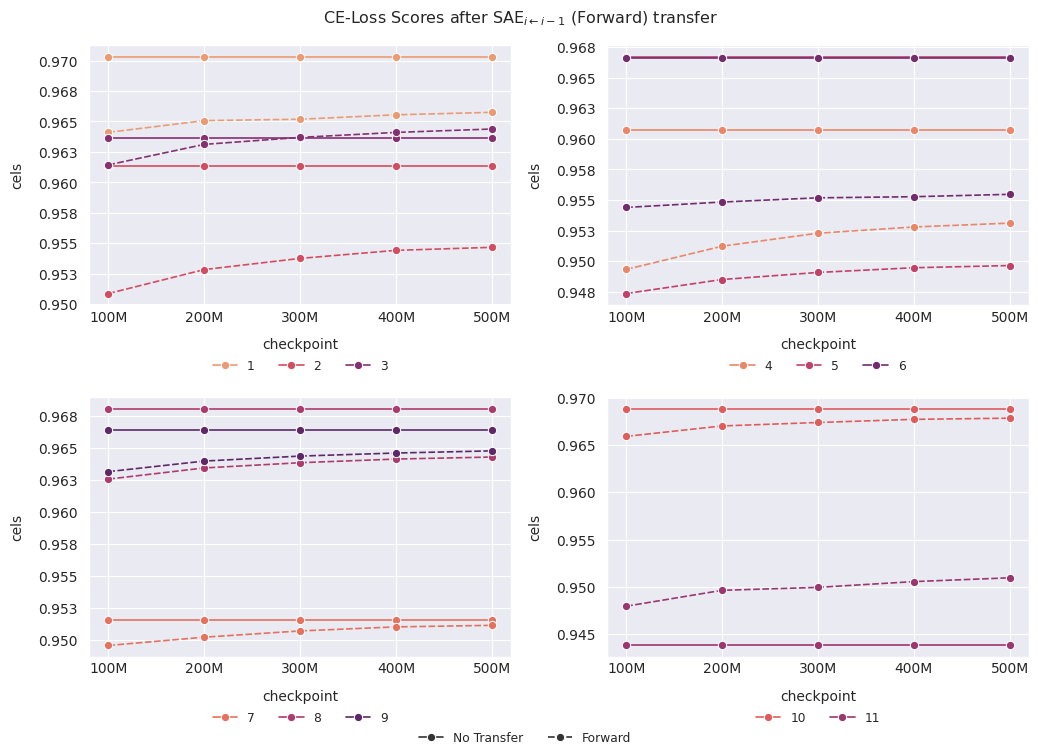

In [27]:
sns.set_context("paper")
colors = sns.color_palette("flare", n_colors=11, as_cmap=False)

fig, axes = plt.subplots(2, 2, figsize=(10.5, 7.5), sharex=False, sharey=False)
for i, layers in enumerate([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11]]):
    ax = axes[i // 2, i % 2]
    sns.lineplot(
        data=cels_fwd_dfs_plot[cels_fwd_dfs_plot["i"].isin(layers)],
        x="checkpoint",
        y="cels",
        hue="i",
        style="type",
        err_style="bars",
        legend="full",
        palette=colors[i:12:4],
        ax=ax,
        marker="o",
        markersize=6,
    )
    h, l = ax.get_legend_handles_labels()
    ax.legend().remove()
    ax.legend(h[1 : 4 - int(i == 3)], l[1 : 4 - int(i == 3)])
    sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, -0.3), ncol=4, title=None, frameon=False)
    ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
    ax.title.set_fontsize(13)
    ax.xaxis.label.set_fontsize(10)
    ax.yaxis.label.set_fontsize(10)
    ax.xaxis.labelpad = 10
    ax.yaxis.labelpad = 10
    ax.tick_params(axis="both", which="major", labelsize=10)
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.3f"))
fig.add_artist(
    matplotlib.legend.Legend(
        fig,
        h[-3 + int(remove_baseline) :],
        l[-3 + int(remove_baseline) :],
        loc="lower center",
        bbox_to_anchor=(0.5, -0.005),
        ncol=3,
        title=None,
        frameon=False,
    )
)
plt.suptitle("CE-Loss Scores after SAE$_{i\leftarrow i-1}$ (Forward) transfer")
plt.tight_layout()
if remove_baseline:
    plt.savefig(IMG_PATH + f"lineplot_cels_fwd_small_all_no_lower_baseline.png", dpi=300, bbox_inches="tight")
else:
    plt.savefig(IMG_PATH + f"lineplot_cels_fwd_small_all.png", dpi=300, bbox_inches="tight")

In [32]:
# Avgs per checkpoint
columns = [col for col in cels_fwd_dfs[0].columns if "checkpoint" not in col.lower()]

ce_fwd_avgs_df = pd.DataFrame.from_dict(
    {
        ckpt.replace("final_", ""): cels_fwd_dfs[i][columns].mean(axis=0).tolist()
        for i, ckpt in enumerate(mapping.values())
    },
    orient="index",
)
ce_fwd_avgs_df.columns = columns
ce_fwd_avgs_df_plot = ce_fwd_avgs_df.reset_index(names="Checkpoint").melt(
    id_vars=["Checkpoint"], var_name="Type", value_name="Avg. CE-Loss Score"
)
ce_fwd_avgs_df_plot.head()

,Checkpoint,Type,Avg. CE-Loss Score
0,100003840,No Transfer,0.962546
1,200003584,No Transfer,0.962546
2,300003328,No Transfer,0.962546
3,400003072,No Transfer,0.962546
4,500002816,No Transfer,0.962546


##### Backward - All checkpoints

In [43]:
sns.set_context("paper")

# Automatic for every ckpt - backward
bwd_scores = {}
for ckpt in mapping.values():
    bwd = read_bwd_eval(ckpt)
    bwd_df = pd.concat(
        [
            base_baseline(baseline)
            .iloc[:-1]
            .reset_index(drop=True)[["ce_loss_score"]]
            .rename(columns={"ce_loss_score": "No Transfer"}),
            base_baseline(bwd)
            .reset_index(drop=True)[["ce_loss_score"]]
            .rename(columns={"ce_loss_score": "Backward"}),
            bwd_baseline(baseline)
            .reset_index(drop=True)[["ce_loss_score"]]
            .rename(columns={"ce_loss_score": "Baseline Backward"}),
        ],
        axis=1,
    )
    bwd_df = bwd_df.to_numpy()
    # (Sae - (base i +- 1)) / ((base i) - (base i +- 1))
    scores = (bwd_df[:, 1] - bwd_df[:, 2]) / (bwd_df[:, 0] - bwd_df[:, 2])
    bwd_scores[ckpt.replace("final_", "")] = list(round(x, 3) for x in scores)

In [44]:
pd.DataFrame.from_dict(bwd_scores, orient="index", columns=np.arange(1, 12))

,1,2,3,4,5,6,7,8,9,10,11
100003840,0.988,0.927,0.964,1.052,0.803,0.375,0.801,1.044,0.920,1.005,0.939
200003584,0.990,0.939,0.969,1.076,0.812,0.396,0.805,1.047,0.912,1.001,0.953
300003328,0.991,0.945,0.972,1.084,0.823,0.412,0.808,1.049,0.913,0.999,0.965
400003072,0.995,0.951,0.975,1.098,0.827,0.420,0.811,1.052,0.912,0.997,0.972
500002816,0.997,0.951,0.975,1.098,0.827,0.425,0.814,1.056,0.913,0.998,0.976


In [45]:
cels_bwd_dfs = []
for i, ckpt in enumerate(mapping.values()):
    bwd = read_bwd_eval(ckpt)
    bwd_df = pd.concat(
        [
            base_baseline(baseline)
            .iloc[:-1]
            .reset_index(drop=True)[["ce_loss_score"]]
            .rename(columns={"ce_loss_score": "No Transfer"}),
            base_baseline(bwd)
            .reset_index(drop=True)[["ce_loss_score"]]
            .rename(columns={"ce_loss_score": "Backward"}),
            bwd_baseline(baseline)
            .reset_index(drop=True)[["ce_loss_score"]]
            .rename(columns={"ce_loss_score": "Baseline Backward"}),
        ],
        axis=1,
    )
    bwd_df["checkpoint"] = ckpt.replace("final_", "")
    cels_bwd_dfs.append(bwd_df)

In [46]:
remove_baseline = True

if remove_baseline:
    cels_bwd_dfs_plot = (
        pd.concat(cels_bwd_dfs, axis=0)
        .reset_index(names="i")
        .melt(id_vars=["checkpoint", "i"], var_name="type", value_name="cels")
    )
    cels_bwd_dfs_plot = cels_bwd_dfs_plot[cels_bwd_dfs_plot["type"] != "Baseline Backward"]
else:
    cels_bwd_dfs_plot = (
        pd.concat(cels_bwd_dfs, axis=0)
        .reset_index(names="i")
        .melt(id_vars=["checkpoint", "i"], var_name="type", value_name="cels")
    )
cels_bwd_dfs_plot.head()

,checkpoint,i,type,cels
0,100003840,0,No Transfer,0.968835
1,100003840,1,No Transfer,0.970317
2,100003840,2,No Transfer,0.961339
3,100003840,3,No Transfer,0.963667
4,100003840,4,No Transfer,0.960696


/tmp/ipykernel_119066/3457660652.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_119066/3457660652.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_119066/3457660652.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_119066/3457660652.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"]

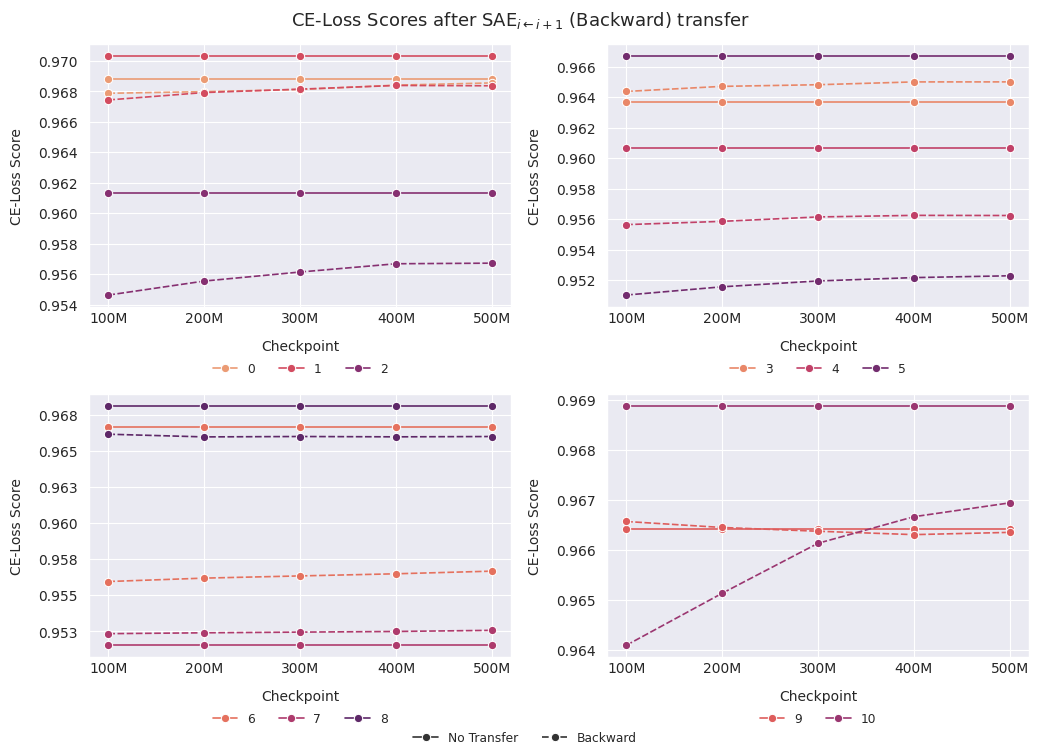

In [47]:
sns.set_context("paper")
colors = sns.color_palette("flare", n_colors=11, as_cmap=False)

fig, axes = plt.subplots(2, 2, figsize=(10.5, 7.5), sharex=False, sharey=False)
for i, layers in enumerate([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10]]):
    ax = axes[i // 2, i % 2]
    sns.lineplot(
        data=cels_bwd_dfs_plot[cels_bwd_dfs_plot["i"].isin(layers)],
        x="checkpoint",
        y="cels",
        hue="i",
        style="type",
        err_style="bars",
        legend="full",
        palette=colors[i:12:4],
        ax=ax,
        marker="o",
        markersize=6,
    )
    h, l = ax.get_legend_handles_labels()
    ax.legend(h[1 : 4 - int(i == 3)], l[1 : 4 - int(i == 3)])
    sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, -0.3), ncol=4, title=None, frameon=False)
    ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
    ax.set_xlabel("Checkpoint")
    ax.set_ylabel("CE-Loss Score")
    ax.title.set_fontsize(13)
    ax.xaxis.label.set_fontsize(10)
    ax.yaxis.label.set_fontsize(10)
    ax.xaxis.labelpad = 10
    ax.yaxis.labelpad = 10
    ax.tick_params(axis="both", which="major", labelsize=10)
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.3f"))
fig.add_artist(
    matplotlib.legend.Legend(
        fig,
        h[-3 + int(remove_baseline) :],
        l[-3 + int(remove_baseline) :],
        loc="lower center",
        bbox_to_anchor=(0.5, -0.005),
        ncol=3,
        title=None,
        frameon=False,
    )
)
plt.suptitle("CE-Loss Scores after SAE$_{i\leftarrow i+1}$ (Backward) transfer", fontsize=13)
plt.tight_layout()
if remove_baseline:
    plt.savefig(IMG_PATH + f"lineplot_cels_bwd_small_all_no_lower_baseline.png", dpi=300, bbox_inches="tight")
else:
    plt.savefig(IMG_PATH + f"lineplot_cels_bwd_small_all.png", dpi=300, bbox_inches="tight")

In [48]:
# Avgs per checkpoint
columns = [col for col in cels_bwd_dfs[0].columns if "checkpoint" not in col.lower()]

ce_bwd_avgs_df = pd.DataFrame.from_dict(
    {
        ckpt.replace("final_", ""): cels_bwd_dfs[i][columns].mean(axis=0).tolist()
        for i, ckpt in enumerate(mapping.values())
    },
    orient="index",
)
ce_bwd_avgs_df.columns = columns
ce_bwd_avgs_df_plot = ce_bwd_avgs_df.reset_index(names="Checkpoint").melt(
    id_vars=["Checkpoint"], var_name="Type", value_name="Avg. CE-Loss Score"
)
ce_bwd_avgs_df_plot.head()

,Checkpoint,Type,Avg. CE-Loss Score
0,100003840,No Transfer,0.964823
1,200003584,No Transfer,0.964823
2,300003328,No Transfer,0.964823
3,400003072,No Transfer,0.964823
4,500002816,No Transfer,0.964823


##### Combined

In [49]:
ce_combined_avgs_df = pd.concat([ce_fwd_avgs_df, ce_bwd_avgs_df], axis=1)
ce_combined_avgs_df.drop(
    columns=[col for col in ce_combined_avgs_df.columns if "No Transfer" in col or "Baseline" in col], inplace=True
)
ce_combined_avgs_df_plot = ce_combined_avgs_df.reset_index(names="Checkpoint").melt(
    id_vars=["Checkpoint"], var_name="Type", value_name="Avg. CE-Loss Score"
)
ce_combined_avgs_df_plot.head()

,Checkpoint,Type,Avg. CE-Loss Score
0,100003840,Forward,0.956055
1,200003584,Forward,0.957259
2,300003328,Forward,0.957764
3,400003072,Forward,0.958146
4,500002816,Forward,0.958364


In [50]:
baseline_avg_ce_loss = (
    baseline[baseline["ACT-Layer"] == baseline["SAE-Layer"]].reset_index(drop=True)[["ce_loss_score"]].mean().item()
)
baseline_avg_ce_loss

0.9630697479880586

/tmp/ipykernel_119066/2309566304.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{i+1}00M" for i in range(5)], va="center", ha="center")


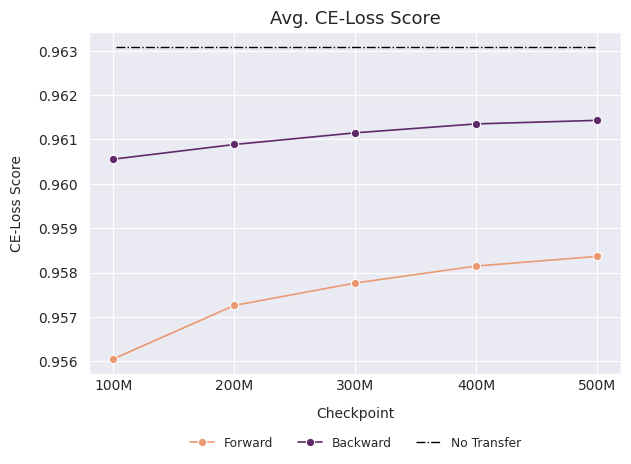

In [73]:
bounds = "mean"
colors = sns.color_palette("flare", n_colors=10)

sns.set_theme("paper")
ax = sns.lineplot(
    data=ce_combined_avgs_df_plot,
    x="Checkpoint",
    y="Avg. CE-Loss Score",
    hue="Type",
    marker="o",
    palette={"Forward": colors[0], "Backward": colors[-1]},
    markersize=6,
)
handles, labels = ax.get_legend_handles_labels()
if "mean" in bounds:
    labels.append("No Transfer")
    handles.append(plt.axhline(y=baseline_avg_ce_loss, xmin=0.05, xmax=0.95, color="black", linewidth=1, ls="-."))
ax.set_title("Avg. CE-Loss Score")
ax.set_ylabel("CE-Loss Score")
ax.set_xticklabels([f"{i+1}00M" for i in range(5)], va="center", ha="center")
ax.title.set_fontsize(13)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.tick_params(axis="both", which="major", labelsize=10)
ax.yaxis.set_major_formatter(FormatStrFormatter("%.3f"))
plt.legend(handles=handles, labels=labels)
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, -0.25), ncol=3, title=None, frameon=False)
plt.tight_layout()
plt.savefig(IMG_PATH + f"avg_ce_loss_score_through_time_combined_bounds_{bounds}.png", dpi=300, bbox_inches="tight")

### L0 plots - bwd

In [58]:
# Automatic for every ckpt - backward
l0_bwd_dfs = []
for ckpt in mapping.values():
    bwd = read_bwd_eval(ckpt)
    bwd_df = pd.concat(
        [
            base_baseline(baseline)
            .iloc[:-1]
            .reset_index(drop=True)[["l0"]]
            .rename(columns={"l0": "No Transfer"}),
            base_baseline(bwd)
            .reset_index(drop=True)[["l0"]]
            .rename(columns={"l0": "Backward"}),
            bwd_baseline(baseline)
            .reset_index(drop=True)[["l0"]]
            .rename(columns={"l0": "Baseline Backward"}),
        ],
        axis=1,
    )
    bwd_df["checkpoint"] = ckpt.replace("final_", "")
    l0_bwd_dfs.append(bwd_df)

In [59]:
remove_baseline = True

if remove_baseline:
    l0_bwd_dfs_plot = (
        pd.concat(l0_bwd_dfs, axis=0)
        .reset_index(names="i")
        .melt(id_vars=["checkpoint", "i"], var_name="type", value_name="l0")
    )
    l0_bwd_dfs_plot = l0_bwd_dfs_plot[l0_bwd_dfs_plot["type"] != "Baseline Backward"]
else:
    l0_bwd_dfs_plot = (
        pd.concat(l0_bwd_dfs, axis=0)
        .reset_index(names="i")
        .melt(id_vars=["checkpoint", "i"], var_name="type", value_name="l0")
    )
l0_bwd_dfs_plot.head()

,checkpoint,i,type,l0
0,100003840,0,No Transfer,13.532349
1,100003840,1,No Transfer,21.895020
2,100003840,2,No Transfer,34.881470
3,100003840,3,No Transfer,71.514771
4,100003840,4,No Transfer,75.308472


/tmp/ipykernel_119066/2189246988.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_119066/2189246988.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_119066/2189246988.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_119066/2189246988.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"]

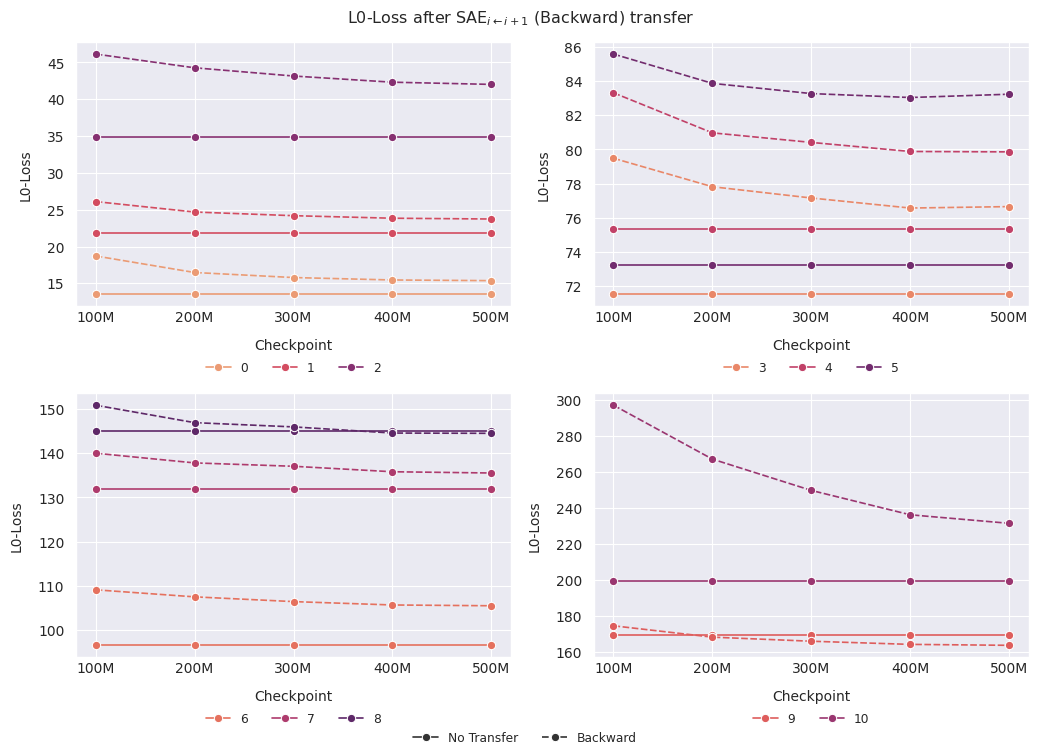

In [61]:
sns.set_context("paper")
colors = sns.color_palette("flare", n_colors=11, as_cmap=False)

fig, axes = plt.subplots(2, 2, figsize=(10.5, 7.5), sharex=False, sharey=False)
for i, layers in enumerate([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10]]):
    ax = axes[i // 2, i % 2]
    sns.lineplot(
        data=l0_bwd_dfs_plot[l0_bwd_dfs_plot["i"].isin(layers)],
        x="checkpoint",
        y="l0",
        hue="i",
        style="type",
        err_style="bars",
        legend="full",
        palette=colors[i:12:4],
        ax=ax,
        marker="o",
        markersize=6,
    )
    h, l = ax.get_legend_handles_labels()
    ax.legend(h[1 : 4 - int(i == 3)], l[1 : 4 - int(i == 3)])
    sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, -0.3), ncol=4, title=None, frameon=False)
    ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
    ax.set_xlabel("Checkpoint")
    ax.set_ylabel("L0-Loss")
    ax.title.set_fontsize(13)
    ax.xaxis.label.set_fontsize(10)
    ax.yaxis.label.set_fontsize(10)
    ax.xaxis.labelpad = 10
    ax.yaxis.labelpad = 10
    ax.tick_params(axis="both", which="major", labelsize=10)
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
fig.add_artist(
    matplotlib.legend.Legend(
        fig,
        h[-3 + int(remove_baseline) :],
        l[-3 + int(remove_baseline) :],
        loc="lower center",
        bbox_to_anchor=(0.5, -0.005),
        ncol=3,
        title=None,
        frameon=False,
    )
)
plt.suptitle("L0-Loss after SAE$_{i\leftarrow i+1}$ (Backward) transfer")
plt.tight_layout()
if remove_baseline:
    plt.savefig(IMG_PATH + f"lineplot_l0_bwd_small_all_no_lower_baseline.png", dpi=300, bbox_inches="tight")
else:
    plt.savefig(IMG_PATH + f"lineplot_l0_bwd_small_all.png", dpi=300, bbox_inches="tight")

In [62]:
# Avgs per checkpoint
l0_bwd_avgs_df = pd.DataFrame.from_dict(
    {
        ckpt.replace("final_", ""): l0_bwd_dfs[i].drop(columns=["checkpoint"]).mean(axis=0).tolist()
        for i, ckpt in enumerate(mapping.values())
    },
    orient="index",
)
l0_bwd_avgs_df.columns = l0_bwd_dfs[0].columns[:-1]
l0_bwd_avgs_df_plot = l0_bwd_avgs_df.reset_index(names="Checkpoint").melt(
    id_vars=["Checkpoint"], var_name="Type", value_name="Avg. L0-Loss"
)
l0_bwd_avgs_df_plot.head()

,Checkpoint,Type,Avg. L0-Loss
0,100003840,No Transfer,93.881436
1,200003584,No Transfer,93.881436
2,300003328,No Transfer,93.881436
3,400003072,No Transfer,93.881436
4,500002816,No Transfer,93.881436


In [63]:
l0_bwd_avgs_df.head()

,No Transfer,Backward,Baseline Backward
100003840,93.881436,110.105458,212.603005
200003584,93.881436,105.083252,212.603005
300003328,93.881436,102.669112,212.603005
400003072,93.881436,100.710416,212.603005
500002816,93.881436,100.162564,212.603005


### L0 plots - fwd

In [64]:
# Automatic for every ckpt - backward
l0_fwd_dfs = []
for ckpt in mapping.values():
    fwd = read_fwd_eval(ckpt)
    fwd_df = pd.concat(
        [
            base_baseline(baseline)
            .iloc[1:]
            .reset_index(drop=True)[["l0"]]
            .rename(columns={"l0": "No Transfer"}),
            base_baseline(fwd)
            .reset_index(drop=True)[["l0"]]
            .rename(columns={"l0": "Forward"}),
            fwd_baseline(baseline)
            .reset_index(drop=True)[["l0"]]
            .rename(columns={"l0": "Baseline Forward"}),
        ],
        axis=1,
    )
    fwd_df["checkpoint"] = ckpt.replace("final_", "")
    l0_fwd_dfs.append(fwd_df)

In [65]:
remove_baseline = True

if remove_baseline:
    l0_fwd_dfs_plot = (
        pd.concat(l0_fwd_dfs, axis=0)
        .reset_index(names="i")
        .melt(id_vars=["checkpoint", "i"], var_name="type", value_name="l0")
    )
    l0_fwd_dfs_plot = l0_fwd_dfs_plot[l0_fwd_dfs_plot["type"] != "Baseline Forward"]
else:
    l0_fwd_dfs_plot = (
        pd.concat(l0_fwd_dfs, axis=0)
        .reset_index(names="i")
        .melt(id_vars=["checkpoint", "i"], var_name="type", value_name="l0")
    )
l0_fwd_dfs_plot["i"] = l0_fwd_dfs_plot["i"] + 1
l0_fwd_dfs_plot.head()

,checkpoint,i,type,l0
0,100003840,1,No Transfer,21.895020
1,100003840,2,No Transfer,34.881470
2,100003840,3,No Transfer,71.514771
3,100003840,4,No Transfer,75.308472
4,100003840,5,No Transfer,73.202515


/tmp/ipykernel_119066/1424501138.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_119066/1424501138.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_119066/1424501138.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_119066/1424501138.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"]

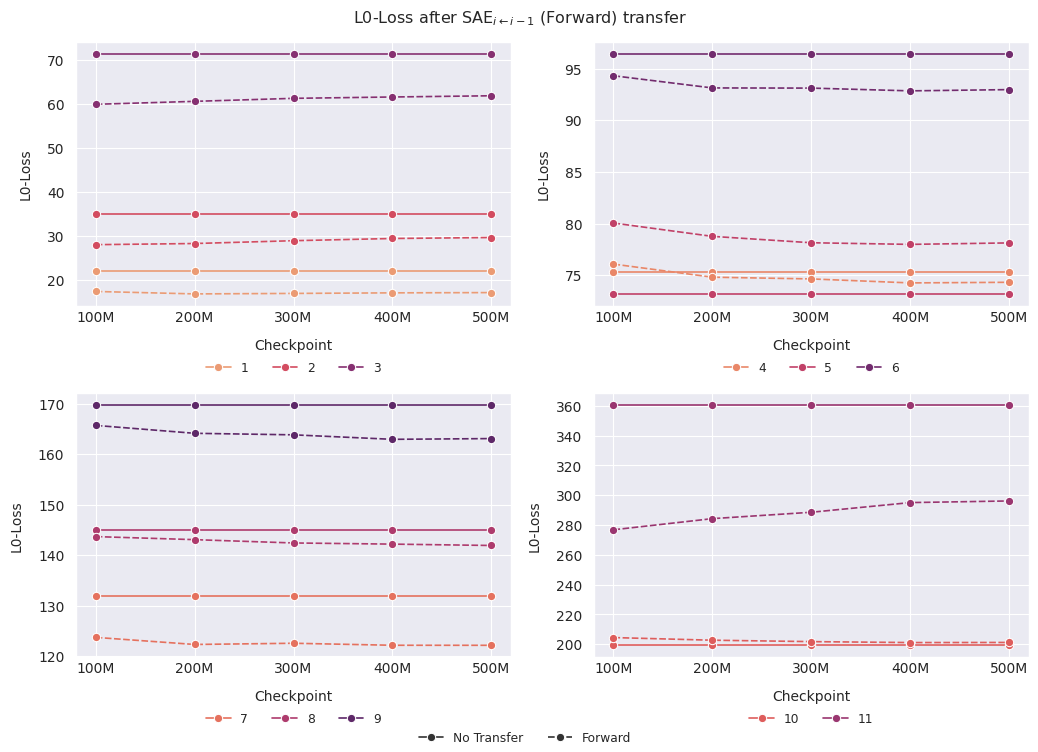

In [66]:
sns.set_context("paper")
colors = sns.color_palette("flare", n_colors=11, as_cmap=False)

fig, axes = plt.subplots(2, 2, figsize=(10.5, 7.5), sharex=False, sharey=False)
for i, layers in enumerate([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11]]):
    ax = axes[i // 2, i % 2]
    sns.lineplot(
        data=l0_fwd_dfs_plot[l0_fwd_dfs_plot["i"].isin(layers)],
        x="checkpoint",
        y="l0",
        hue="i",
        style="type",
        err_style="bars",
        legend="full",
        palette=colors[i:12:4],
        ax=ax,
        marker="o",
        markersize=6,
    )
    h, l = ax.get_legend_handles_labels()
    ax.legend(h[1 : 4 - int(i == 3)], l[1 : 4 - int(i == 3)])
    sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, -0.3), ncol=4, title=None, frameon=False)
    ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
    ax.set_xlabel("Checkpoint")
    ax.set_ylabel("L0-Loss")
    ax.title.set_fontsize(13)
    ax.xaxis.label.set_fontsize(10)
    ax.yaxis.label.set_fontsize(10)
    ax.xaxis.labelpad = 10
    ax.yaxis.labelpad = 10
    ax.tick_params(axis="both", which="major", labelsize=10)
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
fig.add_artist(
    matplotlib.legend.Legend(
        fig,
        h[-3 + int(remove_baseline) :],
        l[-3 + int(remove_baseline) :],
        loc="lower center",
        bbox_to_anchor=(0.5, -0.005),
        ncol=3,
        title=None,
        frameon=False,
    )
)
plt.suptitle("L0-Loss after SAE$_{i\leftarrow i-1}$ (Forward) transfer")
plt.tight_layout()
if remove_baseline:
    plt.savefig(IMG_PATH + f"lineplot_fwd_l0_small_all_no_lower_baseline.png", dpi=300, bbox_inches="tight")
else:
    plt.savefig(IMG_PATH + "lineplot_fwd_l0_small_all.png", dpi=300, bbox_inches="tight")

In [67]:
# Avgs per checkpoint
l0_fwd_avgs_df = pd.DataFrame.from_dict(
    {
        ckpt.replace("final_", ""): l0_fwd_dfs[i].drop(columns=["checkpoint"]).mean(axis=0).tolist()
        for i, ckpt in enumerate(mapping.values())
    },
    orient="index",
)
l0_fwd_avgs_df.columns = l0_fwd_dfs[0].columns[:-1]
l0_fwd_avgs_df_plot = l0_fwd_avgs_df.reset_index(names="Checkpoint").melt(
    id_vars=["Checkpoint"], var_name="Type", value_name="Avg. L0-Loss"
)
l0_fwd_avgs_df_plot.head()

,Checkpoint,Type,Avg. L0-Loss
0,100003840,No Transfer,125.429221
1,200003584,No Transfer,125.429221
2,300003328,No Transfer,125.429221
3,400003072,No Transfer,125.429221
4,500002816,No Transfer,125.429221


In [68]:
l0_combined_avgs_df = pd.concat([l0_fwd_avgs_df, l0_bwd_avgs_df], axis=1)
l0_combined_avgs_df.drop(
    columns=[col for col in l0_combined_avgs_df.columns if "No Transfer" in col or "Baseline" in col], inplace=True
)
l0_combined_avgs_df_plot = l0_combined_avgs_df.reset_index(names="Checkpoint").melt(
    id_vars=["Checkpoint"], var_name="Type", value_name="Avg. L0-Loss"
)
l0_combined_avgs_df_plot.head()

,Checkpoint,Type,Avg. L0-Loss
0,100003840,Forward,115.464422
1,200003584,Forward,115.352439
2,300003328,Forward,115.648204
3,400003072,Forward,116.054011
4,500002816,Forward,116.229492


In [69]:
baseline_avg_l0 = (
    baseline[baseline["ACT-Layer"] == baseline["SAE-Layer"]].reset_index(drop=True)[["l0"]].mean().item()
)
baseline_avg_l0

116.10448201497395

/tmp/ipykernel_119066/3804860311.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{i+1}00M" for i in range(5)], va="center", ha="center")


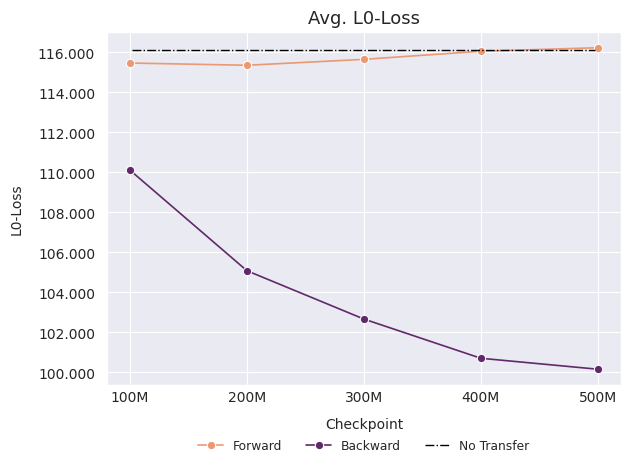

In [72]:
bounds = "mean"
colors = sns.color_palette("flare", n_colors=10)

sns.set_theme("paper")
ax = sns.lineplot(
    data=l0_combined_avgs_df_plot,
    x="Checkpoint",
    y="Avg. L0-Loss",
    hue="Type",
    marker="o",
    palette={"Forward": colors[0], "Backward": colors[-1]},
    markersize=6,
)
handles, labels = ax.get_legend_handles_labels()
if "mean" in bounds:
    labels.append("No Transfer")
    handles.append(plt.axhline(y=baseline_avg_l0, xmin=0.05, xmax=0.95, color="black", linewidth=1, ls="-."))
ax.set_title("Avg. L0-Loss")
ax.set_ylabel("L0-Loss")
ax.set_xticklabels([f"{i+1}00M" for i in range(5)], va="center", ha="center")
ax.title.set_fontsize(13)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.tick_params(axis="both", which="major", labelsize=10)
ax.yaxis.set_major_formatter(FormatStrFormatter("%.3f"))
plt.legend(handles=handles, labels=labels)
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, -0.22), ncol=3, title=None, frameon=False)
plt.tight_layout()
plt.savefig(IMG_PATH + f"avg_l0_loss_score_through_time_combined_bound_{bounds}.png", dpi=300, bbox_inches="tight")

### MSE plots - bwd

In [74]:
# Automatic for every ckpt - backward
mse_bwd_dfs = []
for ckpt in mapping.values():
    bwd = read_bwd_eval(ckpt)
    bwd_df = pd.concat(
        [
            base_baseline(baseline)
            .iloc[:-1]
            .reset_index(drop=True)[["mse"]]
            .rename(columns={"mse": "No Transfer"}),
            base_baseline(bwd)
            .reset_index(drop=True)[["mse"]]
            .rename(columns={"mse": "Backward"}),
            bwd_baseline(baseline)
            .reset_index(drop=True)[["mse"]]
            .rename(columns={"mse": "Baseline Backward"}),
        ],
        axis=1,
    )
    bwd_df["checkpoint"] = ckpt.replace("final_", "")
    mse_bwd_dfs.append(bwd_df)

In [75]:
remove_baseline = True

if remove_baseline:
    mse_bwd_dfs_plot = (
        pd.concat(mse_bwd_dfs, axis=0)
        .reset_index(names="i")
        .melt(id_vars=["checkpoint", "i"], var_name="type", value_name="mse")
    )
    mse_bwd_dfs_plot = mse_bwd_dfs_plot[mse_bwd_dfs_plot["type"] != "Baseline Backward"]
else:
    mse_bwd_dfs_plot = (
        pd.concat(mse_bwd_dfs, axis=0)
        .reset_index(names="i")
        .melt(id_vars=["checkpoint", "i"], var_name="type", value_name="mse")
    )
mse_bwd_dfs_plot.head()

,checkpoint,i,type,mse
0,100003840,0,No Transfer,9.735006
1,100003840,1,No Transfer,19.478878
2,100003840,2,No Transfer,28.633408
3,100003840,3,No Transfer,33.942139
4,100003840,4,No Transfer,38.227737


/tmp/ipykernel_119066/4062465164.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_119066/4062465164.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_119066/4062465164.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_119066/4062465164.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"]

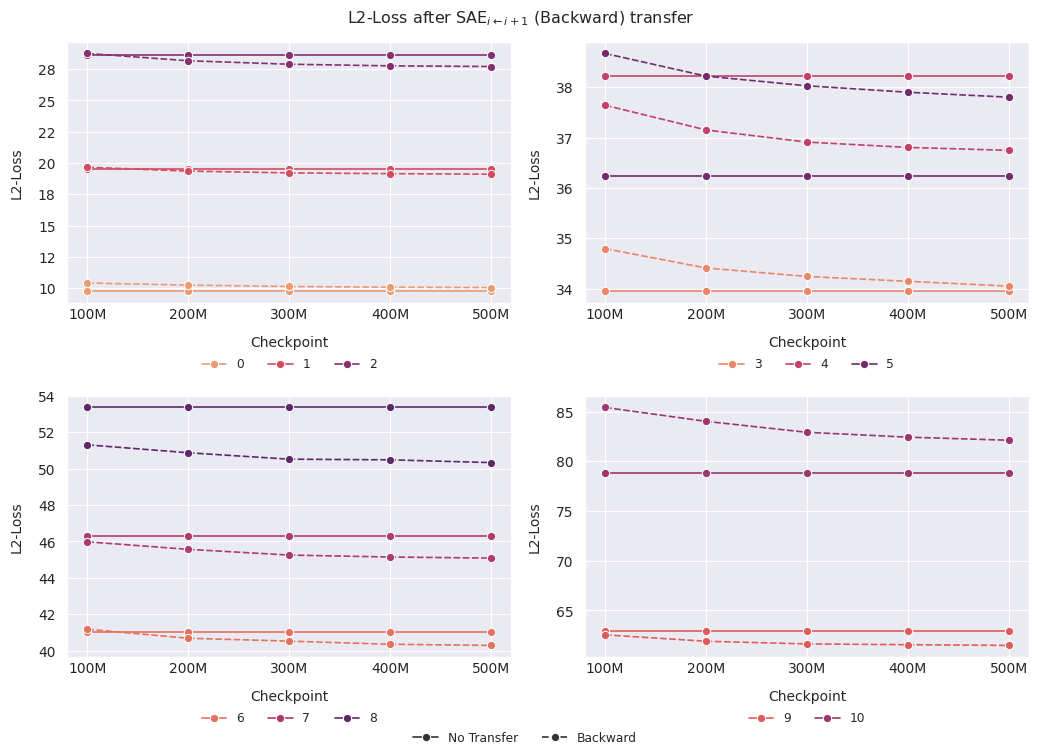

In [76]:
sns.set_context("paper")
colors = sns.color_palette("flare", n_colors=11, as_cmap=False)

fig, axes = plt.subplots(2, 2, figsize=(10.5, 7.5), sharex=False, sharey=False)
for i, layers in enumerate([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10]]):
    ax = axes[i // 2, i % 2]
    sns.lineplot(
        data=mse_bwd_dfs_plot[mse_bwd_dfs_plot["i"].isin(layers)],
        x="checkpoint",
        y="mse",
        hue="i",
        style="type",
        err_style="bars",
        legend="full",
        palette=colors[i:12:4],
        ax=ax,
        marker="o",
        markersize=6,
    )
    h, l = ax.get_legend_handles_labels()
    ax.legend(h[1 : 4 - int(i == 3)], l[1 : 4 - int(i == 3)])
    sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, -0.3), ncol=4, title=None, frameon=False)
    ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
    ax.set_xlabel("Checkpoint")
    ax.set_ylabel("L2-Loss")
    ax.title.set_fontsize(13)
    ax.xaxis.label.set_fontsize(10)
    ax.yaxis.label.set_fontsize(10)
    ax.xaxis.labelpad = 10
    ax.yaxis.labelpad = 10
    ax.tick_params(axis="both", which="major", labelsize=10)
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
fig.add_artist(
    matplotlib.legend.Legend(
        fig,
        h[-3 + int(remove_baseline) :],
        l[-3 + int(remove_baseline) :],
        loc="lower center",
        bbox_to_anchor=(0.5, -0.005),
        ncol=3,
        title=None,
        frameon=False,
    )
)
plt.suptitle("L2-Loss after SAE$_{i\leftarrow i+1}$ (Backward) transfer")
plt.tight_layout()
if remove_baseline:
    plt.savefig(IMG_PATH + f"lineplot_mse_bwd_small_all_no_lower_baseline.png", dpi=300, bbox_inches="tight")
else:
    plt.savefig(IMG_PATH + "lineplot_mse_bwd_small_all.png", dpi=300, bbox_inches="tight")

### MSE plots - fwd

In [77]:
# Automatic for every ckpt - forward
mse_fwd_dfs = []
for ckpt in mapping.values():
    fwd = read_fwd_eval(ckpt)
    fwd_df = pd.concat(
        [
            base_baseline(baseline)
            .iloc[1:]
            .reset_index(drop=True)[["mse"]]
            .rename(columns={"mse": "No Transfer"}),
            base_baseline(fwd)
            .reset_index(drop=True)[["mse"]]
            .rename(columns={"mse": "Forward"}),
            fwd_baseline(baseline)
            .reset_index(drop=True)[["mse"]]
            .rename(columns={"mse": "Baseline Forward"}),
        ],
        axis=1,
    )
    fwd_df["checkpoint"] = ckpt.replace("final_", "")
    mse_fwd_dfs.append(fwd_df)

In [78]:
remove_baseline = True

if remove_baseline:
    mse_fwd_dfs_plot = (
        pd.concat(mse_fwd_dfs, axis=0)
        .reset_index(names="i")
        .melt(id_vars=["checkpoint", "i"], var_name="type", value_name="mse")
    )
    mse_fwd_dfs_plot = mse_fwd_dfs_plot[mse_fwd_dfs_plot["type"] != "Baseline Forward"]
else:
    mse_fwd_dfs_plot = (
        pd.concat(mse_fwd_dfs, axis=0)
        .reset_index(names="i")
        .melt(id_vars=["checkpoint", "i"], var_name="type", value_name="mse")
    )
mse_fwd_dfs_plot["i"] = mse_fwd_dfs_plot["i"] + 1
mse_fwd_dfs_plot.head()

,checkpoint,i,type,mse
0,100003840,1,No Transfer,19.478878
1,100003840,2,No Transfer,28.633408
2,100003840,3,No Transfer,33.942139
3,100003840,4,No Transfer,38.227737
4,100003840,5,No Transfer,36.241077


/tmp/ipykernel_119066/138000869.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_119066/138000869.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_119066/138000869.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_119066/138000869.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va

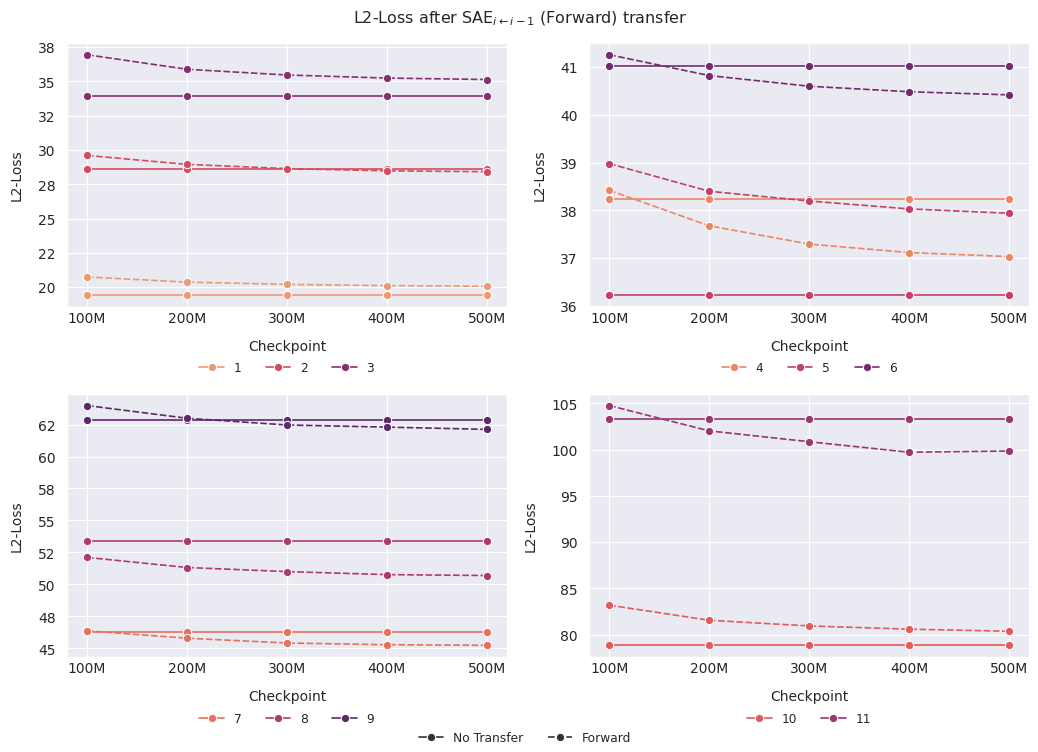

In [79]:
sns.set_context("paper")
colors = sns.color_palette("flare", n_colors=11, as_cmap=False)

fig, axes = plt.subplots(2, 2, figsize=(10.5, 7.5), sharex=False, sharey=False)
for i, layers in enumerate([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11]]):
    ax = axes[i // 2, i % 2]
    sns.lineplot(
        data=mse_fwd_dfs_plot[mse_fwd_dfs_plot["i"].isin(layers)],
        x="checkpoint",
        y="mse",
        hue="i",
        style="type",
        err_style="bars",
        legend="full",
        palette=colors[i:12:4],
        ax=ax,
        marker="o",
        markersize=6,
    )
    h, l = ax.get_legend_handles_labels()
    ax.legend(h[1 : 4 - int(i == 3)], l[1 : 4 - int(i == 3)])
    sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, -0.3), ncol=4, title=None, frameon=False)
    ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
    ax.set_xlabel("Checkpoint")
    ax.set_ylabel("L2-Loss")
    ax.title.set_fontsize(13)
    ax.xaxis.label.set_fontsize(10)
    ax.yaxis.label.set_fontsize(10)
    ax.xaxis.labelpad = 10
    ax.yaxis.labelpad = 10
    ax.tick_params(axis="both", which="major", labelsize=10)
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
fig.add_artist(
    matplotlib.legend.Legend(
        fig,
        h[-3 + int(remove_baseline) :],
        l[-3 + int(remove_baseline) :],
        loc="lower center",
        bbox_to_anchor=(0.5, -0.005),
        ncol=3,
        title=None,
        frameon=False,
    )
)
plt.suptitle("L2-Loss after SAE$_{i\leftarrow i-1}$ (Forward) transfer")
plt.tight_layout()
if remove_baseline:
    plt.savefig(IMG_PATH + f"lineplot_mse_fwd_small_all_no_lower_baseline.png", dpi=300, bbox_inches="tight")
else:
    plt.savefig(IMG_PATH + f"lineplot_mse_fwd_small_all.png", dpi=300, bbox_inches="tight")

In [80]:
# Avgs per checkpoint
mse_bwd_avgs_df = pd.DataFrame.from_dict(
    {
        ckpt.replace("final_", ""): mse_bwd_dfs[i].drop(columns=["checkpoint"]).mean(axis=0).tolist()
        for i, ckpt in enumerate(mapping.values())
    },
    orient="index",
)
mse_bwd_avgs_df.columns = mse_bwd_dfs[0].columns[:-1]
mse_bwd_avgs_df_plot = mse_bwd_avgs_df.reset_index(names="Checkpoint").melt(
    id_vars=["Checkpoint"], var_name="Type", value_name="Avg. MSE-Loss"
)
mse_bwd_avgs_df_plot.head()

,Checkpoint,Type,Avg. MSE-Loss
0,100003840,No Transfer,40.7847
1,200003584,No Transfer,40.7847
2,300003328,No Transfer,40.7847
3,400003072,No Transfer,40.7847
4,500002816,No Transfer,40.7847


In [81]:
# Avgs per checkpoint
mse_fwd_avgs_df = pd.DataFrame.from_dict(
    {
        ckpt.replace("final_", ""): mse_fwd_dfs[i].drop(columns=["checkpoint"]).mean(axis=0).tolist()
        for i, ckpt in enumerate(mapping.values())
    },
    orient="index",
)
mse_fwd_avgs_df.columns = mse_fwd_dfs[0].columns[:-1]
mse_fwd_avgs_df_plot = mse_fwd_avgs_df.reset_index(names="Checkpoint").melt(
    id_vars=["Checkpoint"], var_name="Type", value_name="Avg. MSE-Loss"
)
mse_fwd_avgs_df_plot.head()

,Checkpoint,Type,Avg. MSE-Loss
0,100003840,No Transfer,49.29628
1,200003584,No Transfer,49.29628
2,300003328,No Transfer,49.29628
3,400003072,No Transfer,49.29628
4,500002816,No Transfer,49.29628


#### Combined MSE fwd and bwd

In [82]:
baseline_avg_mse = (
    baseline[baseline["ACT-Layer"] == baseline["SAE-Layer"]].reset_index(drop=True)[["mse"]].mean().item()
)
baseline_avg_mse

45.999507109324135

In [83]:
mse_combined_avgs_df = pd.concat([mse_fwd_avgs_df, mse_bwd_avgs_df], axis=1)
mse_combined_avgs_df.drop(columns=[col for col in mse_combined_avgs_df.columns if "No Transfer" in col or "Baseline" in col], inplace=True)
mse_combined_avgs_df_plot = mse_combined_avgs_df.reset_index(names="Checkpoint").melt(
    id_vars=["Checkpoint"], var_name="Type", value_name="Avg. MSE-Loss"
)
mse_combined_avgs_df_plot

,Checkpoint,Type,Avg. MSE-Loss
0,100003840,Forward,50.581634
1,200003584,Forward,49.619966
2,300003328,Forward,49.192228
3,400003072,Forward,48.924061
4,500002816,Forward,48.846097
5,100003840,Backward,41.486388
6,200003584,Backward,40.961787
7,300003328,Backward,40.658241
8,400003072,Backward,40.525941
9,500002816,Backward,40.431466


### Combined CE-Score - L0 - MSE

/tmp/ipykernel_119066/4002435692.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{i+1}00M" for i in range(5)], va="center", ha="center")
/tmp/ipykernel_119066/4002435692.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{i+1}00M" for i in range(5)], va="center", ha="center")
/tmp/ipykernel_119066/4002435692.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{i+1}00M" for i in range(5)], va="center", ha="center")


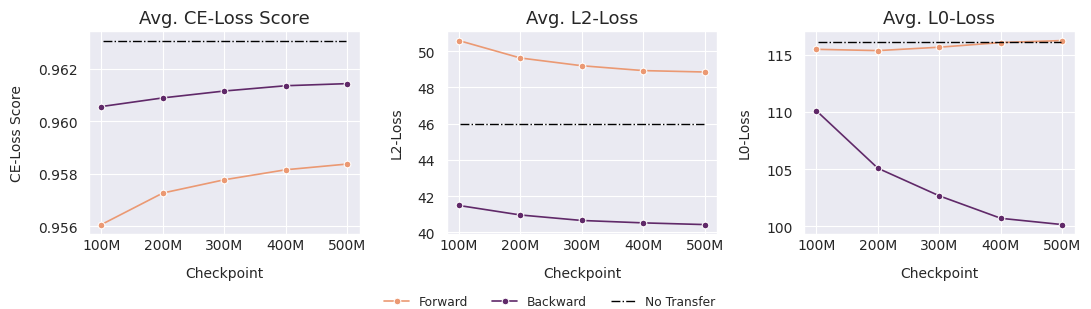

In [84]:
palette = sns.color_palette("flare", as_cmap=False, n_colors=10)
fig, axes = plt.subplots(1, 3, figsize=(11, 3), sharex=True, sharey=False)

ax = axes[0]
sns.set_theme("paper")
sns.lineplot(
    data=ce_combined_avgs_df_plot,
    x="Checkpoint",
    y="Avg. CE-Loss Score",
    hue="Type",
    marker="o",
    palette={"Forward": palette[0], "Backward": palette[-1]},
    ax=ax,
    legend=None,
)
ax.axhline(y=baseline_avg_ce_loss, xmin=0.05, xmax=0.95, color="black", linewidth=1, ls="-.")
ax.set_title("Avg. CE-Loss Score")
ax.set_ylabel("CE-Loss Score")
ax.set_xticklabels([f"{i+1}00M" for i in range(5)], va="center", ha="center")
ax.title.set_fontsize(13)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.tick_params(axis="both", which="major", labelsize=10)
ax.yaxis.set_major_formatter(FormatStrFormatter("%.3f"))
plt.tight_layout()

ax = axes[1]
sns.set_theme("paper")
sns.lineplot(
    data=mse_combined_avgs_df_plot,
    x="Checkpoint",
    y="Avg. MSE-Loss",
    hue="Type",
    marker="o",
    palette={"Forward": palette[0], "Backward": palette[-1]},
    ax=ax,
    legend=None,
)
ax.axhline(y=baseline_avg_mse, xmin=0.05, xmax=0.95, color="black", linewidth=1, ls="-.")
ax.set_title("Avg. L2-Loss")
ax.set_ylabel("L2-Loss")
ax.set_xticklabels([f"{i+1}00M" for i in range(5)], va="center", ha="center")
ax.title.set_fontsize(13)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.tick_params(axis="both", which="major", labelsize=10)
ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
plt.tight_layout()

ax = axes[2]
sns.lineplot(
    data=l0_combined_avgs_df_plot,
    x="Checkpoint",
    y="Avg. L0-Loss",
    hue="Type",
    marker="o",
    palette={"Forward": palette[0], "Backward": palette[-1]},
    ax=ax,
)
ax.set_title("Avg. L0-Loss")
ax.set_ylabel("L0-Loss")
ax.set_xticklabels([f"{i+1}00M" for i in range(5)], va="center", ha="center")
ax.title.set_fontsize(13)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.tick_params(axis="both", which="major", labelsize=10)
ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
h, l = ax.get_legend_handles_labels()
ax.legend().remove()
l.append("No Transfer")
h.append(plt.axhline(y=baseline_avg_l0, xmin=0.05, xmax=0.95, color="black", linewidth=1, ls="-."))
fig.add_artist(
    matplotlib.legend.Legend(
        fig,
        h,
        l,
        loc="lower center",
        bbox_to_anchor=(0.5, -0.035),
        ncol=5,
        title=None,
        frameon=False,
    )
)
plt.tight_layout()
plt.savefig(IMG_PATH + "avg_ce_mse_l0_through_time_combined.png", dpi=300, bbox_inches="tight")

## Distances

In [ ]:
import torch
from sae_lens import ActivationsStore, HookedSAETransformer
from sae_lens.config import LanguageModelSAERunnerConfig
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
cfg = LanguageModelSAERunnerConfig(
    # Data Generating Function (Model + Training Distibuion)
    model_name="pythia-160m-deduped",
    hook_name=None,
    hook_layer=None,
    dataset_path="NeelNanda/pile-small-tokenized-2b",
    is_dataset_tokenized=True,
    context_size=1024,
    streaming=True,
    # SAE Parameters
    architecture="jumprelu",
    d_in=768,
    d_sae=None,
    b_dec_init_method="zeros",
    expansion_factor=8,
    activation_fn="relu",  # relu, tanh-relu, topk
    normalize_sae_decoder=True,
    from_pretrained_path=None,
    apply_b_dec_to_input=False,
    # Activation Store Parameters
    n_batches_in_buffer=128,
    # Misc
    device=device,
    seed=42,
    dtype="float32",
    prepend_bos=False,
)

model = HookedSAETransformer.from_pretrained("pythia-160m-deduped").to(device)
activation_store = ActivationsStore.from_config(model, cfg)

In [ ]:
n_batches = 8
batch_size = 8

activations = []

for _ in tqdm(range(n_batches)):
    batch_tokens = activation_store.get_batch_tokens(batch_size)
    with torch.no_grad():
        _, cache = model.run_with_cache(batch_tokens)

    activations.append(cache.stack_activation('resid_post').cpu())
    del cache

activations = torch.cat(activations, dim=1).reshape(model.cfg.n_layers, -1, model.cfg.d_model) # [L, N, D]

In [ ]:
activations.shape

In [ ]:
# Compute the dot product between pairs of layers along dimension N
dot_products = torch.einsum('ijk,mjk->jim', activations, activations) # [N, L, L]

# Compute the norms of each layer vector
norms = torch.norm(activations, dim=-1)  # [L, N]

# Compute normalized dot products
normalized_dot_products = dot_products / torch.einsum('ik,jk->kij', norms, norms)  # [N, L, L]

# Ensure numerical stability by clamping the values in the range [-1, 1]
normalized_dot_products = torch.clamp(normalized_dot_products, -1.0, 1.0)

# Compute angular distances (arccos of the normalized dot products)
angular_distances = torch.acos(normalized_dot_products) / torch.pi * 2

# Average over dimension N
average_angular_distances = angular_distances.mean(dim=0)

In [ ]:
# Use seaborn to plot a heatmap out of baseline[["ce_loss_score"]].to_numpy().reshape(12, 12)
sns.set_theme()
plt.figure(figsize=(7, 5.2))
ax = sns.heatmap(
    average_angular_distances.cpu().numpy(),
    annot=True,
    fmt=".2f",
    cmap="Blues",
    annot_kws={"size": 8},
    # vmax=1,
    # vmin=-1,
    cbar=False,
)
ax.set_title("Bwd CE-Loss Score - SAE$_{i \leftarrow i+1}$")
ax.set_ylabel("ACT Layer")
ax.set_xlabel("$i$")
ax.set_xticklabels(np.arange(0, 11), va="center", ha="center")
ax.set_yticklabels(np.arange(0, 12), va="center", ha="center")
plt.tight_layout()
plt.savefig(IMG_PATH + "heatmap_angular_distances.png", dpi=300, bbox_inches="tight")
plt.show()